## **Import libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets , layers, models
from sklearn.metrics import confusion_matrix , classification_report
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

2024-03-06 20:58:06.114032: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 20:58:06.114178: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 20:58:06.275537: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()
X_train.shape 

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape 

(10000, 32, 32, 3)

### **Make data 1D**

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

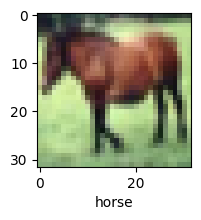

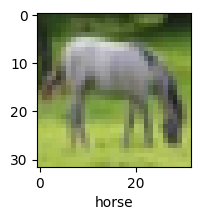

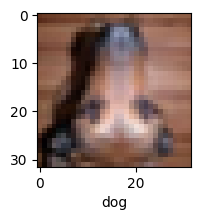

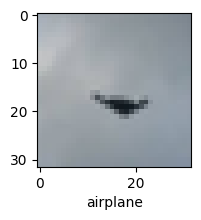

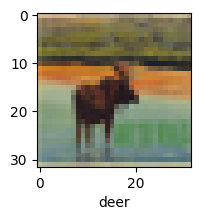

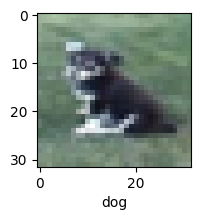

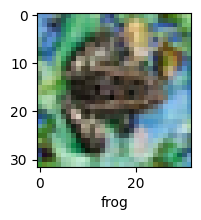

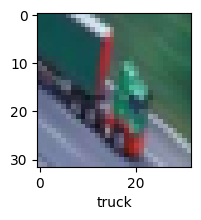

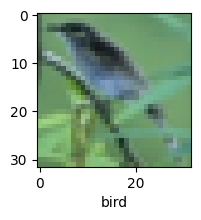

In [9]:
plot_sample(X_train, y_train, 7)
plot_sample(X_train, y_train,87)
plot_sample(X_train, y_train,107)
plot_sample(X_train, y_train, 557)
plot_sample(X_train, y_train, 66)
plot_sample(X_train, y_train, 70)
plot_sample(X_train, y_train, 200)
plot_sample(X_train, y_train, 50)
plot_sample(X_train, y_train, 800)

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## **ANN model**

In [11]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), #flatten makes it 1D instead of 2D
        layers.Dense(500, activation='relu'),
        layers.Dense(400, activation='relu'),
        layers.Dense(10, activation='sigmoid')#10 neurals because we have 10 classes     
    ])

ann.compile(optimizer='SGD',  #Stochastic Gradient Descent
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=60)

Epoch 1/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2919 - loss: 1.9666
Epoch 2/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4006 - loss: 1.6879
Epoch 3/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4356 - loss: 1.6005
Epoch 4/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4623 - loss: 1.5307
Epoch 5/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4744 - loss: 1.4838
Epoch 6/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4931 - loss: 1.4394
Epoch 7/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5008 - loss: 1.4102
Epoch 8/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5155 - loss: 1.3812
Epoch 9/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5237 - loss: 1.3528
Epoch 10/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5379 - loss: 1.3223
Epoch 11/60
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5420 - loss: 1.2947
Epoch 12/60
1563/15

In [12]:
ann.evaluate(X_test, y_test) # retun loss and accuracy of test data

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5328 - loss: 1.7268


[1.7254239320755005, 0.5333999991416931]

### **Classification Report**

In [13]:
#the report gives you the accuracy of each class 
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.41      0.84      0.55      1000
           1       0.66      0.66      0.66      1000
           2       0.45      0.41      0.43      1000
           3       0.44      0.24      0.31      1000
           4       0.50      0.40      0.45      1000
           5       0.49      0.45      0.47      1000
           6       0.56      0.65      0.60      1000
           7       0.64      0.59      0.61      1000
           8       0.77      0.49      0.60      1000
           9       0.59      0.60      0.59      1000

    accuracy                           0.53     10000
   macro avg       0.55      0.53      0.53     10000
weighted avg       0.55      0.53      0.53     10000



## **CNN model**

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu",input_shape=(32,32,3)),
    layers.MaxPool2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [15]:
cnn.compile(optimizer="adam",
           loss="sparse_categorical_crossentropy",
           metrics=["accuracy"])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 31ms/step - accuracy: 0.3816 - loss: 1.6815
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.6006 - loss: 1.1370
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.6543 - loss: 0.9909
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.6906 - loss: 0.8979
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.7138 - loss: 0.8174
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.7350 - loss: 0.7563
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.7491 - loss: 0.7216
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.7729 - loss: 0.6566
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.7816 - loss: 0.6259
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.7909 - loss: 0.5874


In [17]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7069 - loss: 0.8953


[0.9070240259170532, 0.7016000151634216]

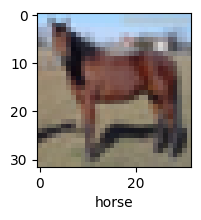

In [18]:
plot_sample(X_test, y_test,800)